In [3]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [1]:
base_path = './sensitive_data/machine_data/Bearbeitung_04'

In [4]:
data = []
for f in os.listdir(base_path):
    idx = int(re.search("_([0-9]+)\.csv", f).group(1))
    d = pd.read_csv(os.path.join(base_path, f), parse_dates=["TimeStamp"])
    d["bauteil_idx"] = idx
    d.set_index(["bauteil_idx", "TimeStamp"], inplace=True)
    data.append(d)
data = pd.concat(data).sort_index()

In [5]:
data

FastNc_axis_SP1_AxTorqueAct  \
bauteil_idx TimeStamp                                              
1           2021-09-29 15:24:03.148                        -1.04   
            2021-09-29 15:24:03.154                        -1.40   
            2021-09-29 15:24:03.160                        -0.40   
            2021-09-29 15:24:03.166                        -1.77   
            2021-09-29 15:24:03.172                        -1.75   
...                                                          ...   
800         2021-10-13 14:38:41.168                       -35.27   
            2021-10-13 14:38:41.174                       -30.10   
            2021-10-13 14:38:41.180                       -33.76   
            2021-10-13 14:38:41.186                       -34.51   
            2021-10-13 14:38:41.192                       -34.81   

                                     FastNc_axis_X_AxTorqueAct  \
bauteil_idx TimeStamp                                            
1           2021-09-29 15:24:03.148                       1.20   
            2021-09-29 15:24:03.154                       1.19   
            2021-09-29 15:24:03.160                       1.38   
            2021-09-29 15:24:03.166                       1.48   
            2021-09-29 15:24:03.172                       1.51   
...                                                        ...   
800         2021-10-13 14:38:41.168                       7.35   
            2021-10-13 14:38:41.174                       7.37   
            2021-10-13 14:38:41.180                       7.26   
            2021-10-13 14:38:41.186                       3.21   
            2021-10-13 14:38:41.192                       8.67   

                                     FastNc_axis_Y1_AxTorqueAct  \
bauteil_idx TimeStamp                                             
1           2021-09-29 15:24:03.148                      -22.63   
            2021-09-29 15:24:03.154                      -22.63   
            2021-09-29 15:24:03.160                      -22.52   
            2021-09-29 15:24:03.166                      -23.70   
            2021-09-29 15:24:03.172                      -31.16   
...                                                         ...   
800         2021-10-13 14:38:41.168                      -31.91   
            2021-10-13 14:38:41.174                      -30.40   
            2021-10-13 14:38:41.180                      -31.93   
            2021-10-13 14:38:41.186                      -31.93   
            2021-10-13 14:38:41.192                      -32.59   

                                     FastNc_axis_Z1_AxTorqueAct  \
bauteil_idx TimeStamp                                             
1           2021-09-29 15:24:03.148                       14.06   
            2021-09-29 15:24:03.154                       10.83   
            2021-09-29 15:24:03.160                        6.60   
            2021-09-29 15:24:03.166                        3.48   
            2021-09-29 15:24:03.172                        4.58   
...                                                         ...   
800         2021-10-13 14:38:41.168                        5.44   
            2021-10-13 14:38:41.174                        1.86   
            2021-10-13 14:38:41.180                        3.75   
            2021-10-13 14:38:41.186                        3.55   
            2021-10-13 14:38:41.192                        4.53   

                                     FastNc_axis_SP1_AxVeloAct  
bauteil_idx TimeStamp                                           
1           2021-09-29 15:24:03.148                   954080.2  
            2021-09-29 15:24:03.154                   954018.4  
            2021-09-29 15:24:03.160                   954018.4  
            2021-09-29 15:24:03.166                   953956.6  
            2021-09-29 15:24:03.172                   954039.0  
...                                                        ...  
800         2021-10-13 14:38:

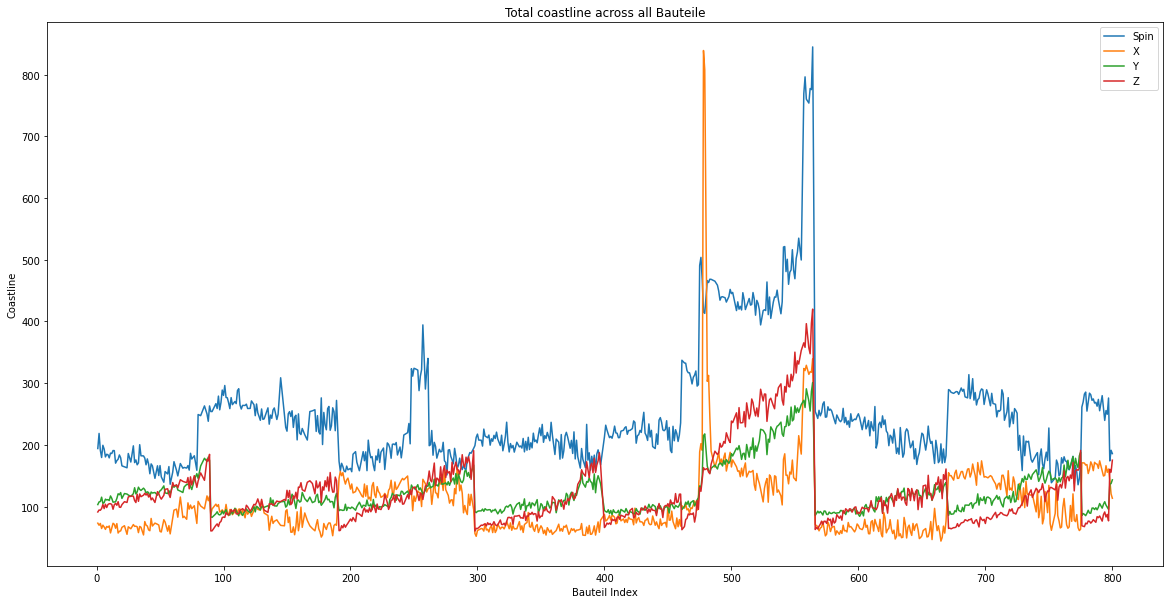

In [6]:
diffs = data.groupby("bauteil_idx").diff(-1).abs()
coastline = diffs.groupby("bauteil_idx").sum()

plt.figure(figsize=(20,10))
plt.title("Total coastline across all Bauteile")
plt.xlabel("Bauteil Index")
plt.ylabel("Coastline")
plt.plot(coastline.iloc[:,:4])
plt.legend(["Spin", "X", "Y", "Z"])
plt.show()

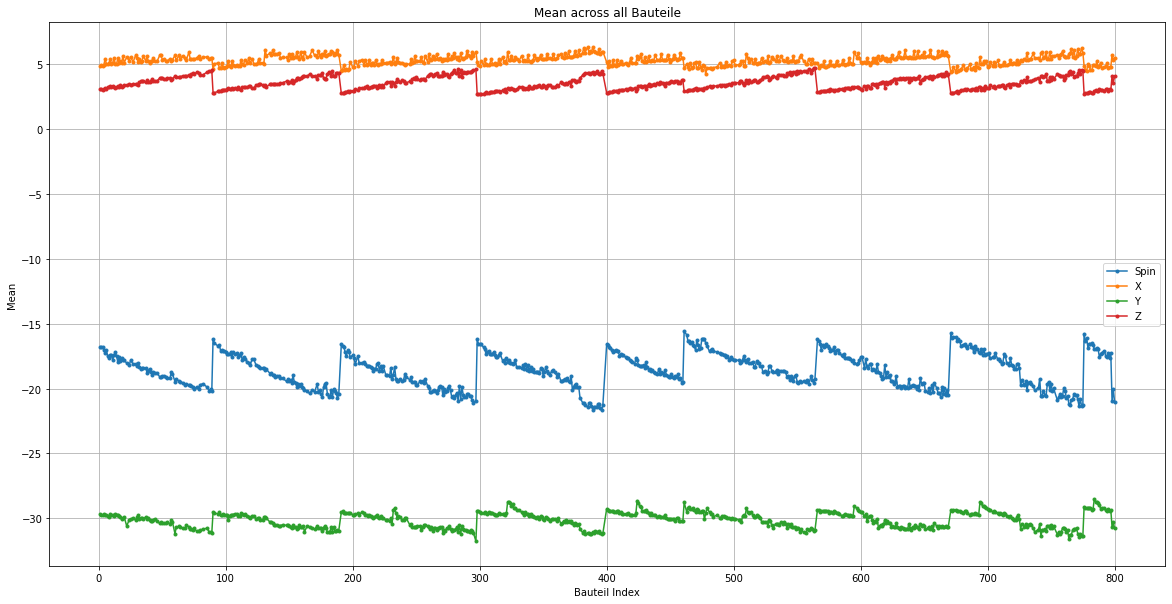

In [7]:
means = data.groupby("bauteil_idx").mean()

plt.figure(figsize=(20,10))
plt.title("Mean across all Bauteile")
plt.xlabel("Bauteil Index")
plt.ylabel("Mean")
plt.grid()
plt.plot(means.iloc[:,:4], marker=".")
plt.legend(["Spin", "X", "Y", "Z"])
plt.show()

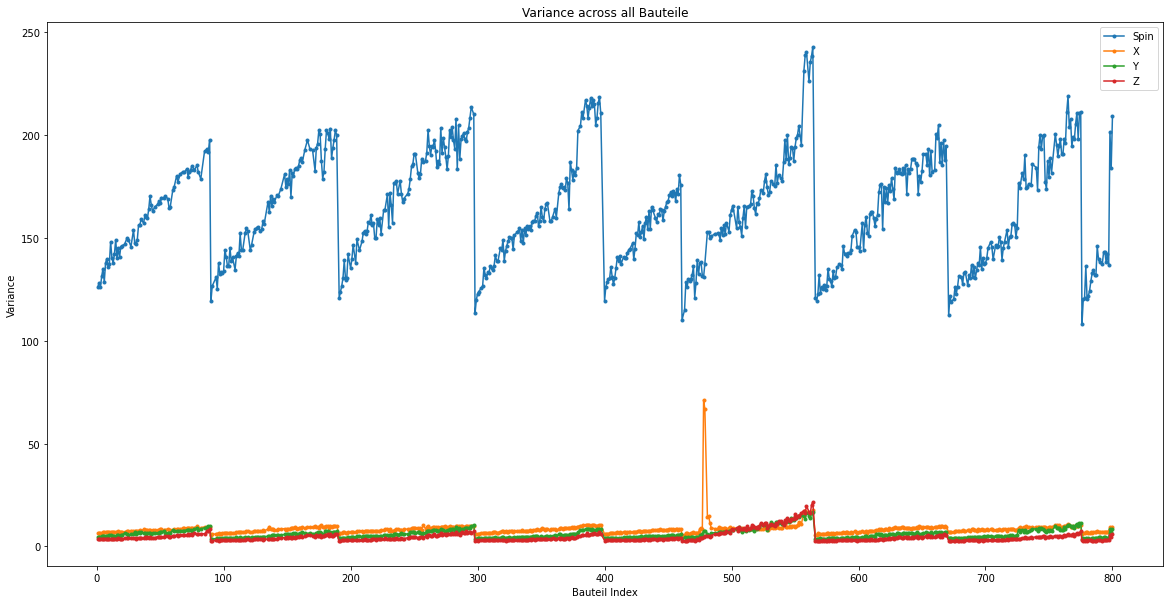

In [8]:
variance = data.groupby("bauteil_idx").var()

plt.figure(figsize=(20,10))
plt.title("Variance across all Bauteile")
plt.xlabel("Bauteil Index")
plt.ylabel("Variance")
plt.plot(variance.iloc[:,:4], marker=".")
plt.legend(["Spin", "X", "Y", "Z"])
plt.show()